In [1]:
import numpy as np 
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
import time

The $SABA_{2}C = C(SABA_2)C$ intergrator of the Henon-Heiles Hamiltonian - we employ this to compute the maximal Lyapunov characteristic exponents (mLCE).
This symplectic integrator is of order 4

In [2]:
start_time = time.time()
#integration of the Henon-Heiles system
N = 1000
a = 0
b = 25
h = 0.05#(b-a)/N
H = 1/8                             #the total energy of the system

In [3]:
#intialize vectors
x_c1 = np.zeros(N, dtype = 'float')
y_c1 = np.zeros(N, dtype = 'float')
px_d1 = np.zeros(N, dtype = 'float')
py_d1 = np.zeros(N, dtype = 'float')
x_c2 = np.zeros(N, dtype = 'float')
y_c2 = np.zeros(N, dtype = 'float')
px_c = np.zeros(N, dtype = 'float')
py_c = np.zeros(N, dtype = 'float')
H_new = np.zeros(N, dtype = 'float')
error = np.zeros(N, dtype = 'float')

In [4]:
#intialize deviation vectors
dx_c1 = np.zeros(N, dtype = 'float')
dy_c1 = np.zeros(N, dtype = 'float')
dpx_d1 = np.zeros(N, dtype = 'float')
dpy_d1 = np.zeros(N, dtype = 'float')
dx_c2 = np.zeros(N, dtype = 'float')
dy_c2 = np.zeros(N, dtype = 'float')
dpx_c = np.zeros(N, dtype = 'float')
dpy_c = np.zeros(N, dtype = 'float')

In [5]:
#set intial conditions 
x0 = 0
y0 = 0.1
py0 = 0

#set initial conditions of the deviation vectors
dx0=1
dy0 = 0
dpx0 = 0
dpy0 = 0
#define dunction to find px0
def initial_px(x0, y0, py0):
    return np.sqrt(2*H - py0**2  - y0**2 - 2*x0**2*y0 + (2/3)*y0**2)
px0 = initial_px(x0, y0, py0)

In [6]:
#function for normalizing deviation vectors
def alpha(dx, dy, dpx, dpy):
    return np.linalg.norm([dx, dy, dpx, dpy])

In [7]:
#normalize the intial deviation vector
dx0 = dx0/alpha(dx0, dy0, dpx0, dpy0)

In [8]:
#set the integration constants
c1 = 1/2 - np.sqrt(3)/6
c2 = np.sqrt(3)/3
d1 = 1/2
c = (2 - np.sqrt(3))/24

In [9]:
#empty vector to store the evolution of the X_1(t)
LCE = np.zeros(N, dtype = 'float')
vec = np.zeros(N, dtype = 'float')

In [10]:
i = 0
while i<N-1:
    #filling the first entries
    px_c[0] = px0
    py_c[0] = py0
    x_c1[0] = x0
    y_c1[0] = y0
    dpx_c[0] = dpx0
    dpy_c[0] = dpy0
    dx_c1[0] = dx0
    dy_c1[0] = dy0
    
    px_c[i+1] = px_c[i] + c*(h**3)*x_c1[i]*(1 + 2*x_c1[i]**2 + 6*y_c1[i]  + 2*y_c1[i]**2)
    py_c[i+1] = py_c[i] + c*(h**3)*(y_c1[i] - 3*y_c1[i]**2 + 2*y_c1[i]**3 + 3*x_c1[i]**2 + 2*(x_c1[i]**2)*y_c1[i])
    dpx_c[i+1] = dpx_c[i] + c*(h**3)*((1 + 6*x_c1[i]**2 + 2*y_c1[i]**2 + 6*y_c1[i])*dx_c1[i] + 2*x_c1[i]*(3 + 2*y_c1[i])*dy_c1[i])
    dpy_c[i+1] = dpy_c[i] + c*(h**3)*(2*x_c1[i]*(3 + 2*y_c1[i])*dx_c1[i] + (1 + 2*x_c1[i]**2 + 6*y_c1[i]**2 - 6*y_c1[i])*dy_c1[i])
    
    
    x_c1[i+1] = x_c1[i] + c1*h*px_c[i+1]
    y_c1[i+1] = y_c1[i] + c1*h*py_c[i+1]
    dx_c1[i+1] = dx_c1[i] + c1*h*dpx_c[i+1]
    dy_c1[i+1] = dy_c1[i] + c1*h*dpy_c[i+1]
    
    
    px_d1[i] = px_c[i+1] - d1*h*x_c1[i+1]*(1 + 2*y_c1[i+1])
    py_d1[i] = py_c[i+1] + d1*h*(y_c1[i+1]**2 - x_c1[i+1]**2  - y_c1[i+1])
    dpx_d1[i] = dpx_c[i+1] - d1*h*((1 + 2*y_c1[i+1])*dx_c1[i+1] + 2*x_c1[i+1]*dy_c1[i+1])
    dpy_d1[i] = dpy_c[i+1] + d1*h*(-2*x_c1[i+1]*dx_c1[i+1] + (-1 + 2*y_c1[i+1])*dy_c1[i+1])
    
    
    x_c2[i] = x_c1[i+1] + c2*h*px_d1[i]
    y_c2[i] = y_c1[i+1] + c2*h*py_d1[i]
    dx_c2[i] = dx_c1[i+1] + c2*h*dpx_d1[i]
    dy_c2[i] = dy_c1[i+1] + c2*h*dpy_d1[i]
    
    
    px_d1[i+1] = px_d1[i] - d1*h*x_c2[i]*(1 + 2*y_c2[i])
    py_d1[i+1] = py_d1[i] + d1*h*(y_c2[i]**2 - x_c2[i]**2  - y_c2[i])
    dpx_d1[i+1] = dpx_d1[i] - d1*h*((1 + 2*y_c2[i])*dx_c2[i] + 2*x_c2[i]*dy_c2[i])
    dpy_d1[i+1] = dpy_d1[i] + d1*h*(-2*x_c2[i]*dx_c2[i] + (-1 + 2*y_c2[i])*dy_c2[i])
    
    
    x_c1[i+1] = x_c2[i] + c1*h*px_d1[i+1]
    y_c1[i+1] = y_c2[i] + c1*h*py_d1[i+1]
    dx_c1[i+1] = dx_c2[i] + c1*h*dpx_d1[i+1]
    dy_c1[i+1] = dy_c2[i] + c1*h*dpy_d1[i+1]
    
    px_c[i+1] = px_d1[i+1] + c*(h**3)*x_c1[i+1]*(1 + 2*x_c1[i+1]**2 + 6*y_c1[i+1]  + 2*y_c1[i+1]**2)
    py_c[i+1] = py_d1[i+1] + c*(h**3)*(y_c1[i+1] - 3*y_c1[i+1]**2 + 2*y_c1[i+1]**3 + 3*x_c1[i+1]**2 + 2*(x_c1[i+1]**2)*y_c1[i+1])
    dpx_c[i+1] = dpx_d1[i+1] + c*(h**3)*((1 + 6*x_c1[i+1]**2 + 2*y_c1[i+1]**2 + 6*y_c1[i+1])*dx_c1[i+1] + 2*x_c1[i+1]*(3 + 2*y_c1[i+1])*dy_c1[i+1])
    dpy_c[i+1] = dpy_d1[i+1] + c*(h**3)*(2*x_c1[i+1]*(3 + 2*y_c1[i+1])*dx_c1[i+1] + (1 + 2*x_c1[i+1]**2 + 6*y_c1[i+1]**2 - 6*y_c1[i+1])*dy_c1[i+1])
    
    #computation of the largest lyapunov exponent
    for idx in range(i):
        if i == 0:
            '''
            LCE[i+1] = (1/(h))*np.sum(np.log(alpha(dx_c1[idx], dy_c1[idx], dpx_c[idx], dpy_c[idx])))
            lyapunov = (1/(h))*np.sum(np.log(alpha(dx_c1[idx], dy_c1[idx], dpx_c[idx], dpy_c[idx])))
            '''
            vec[idx] = np.log(alpha(dx_c1[idx], dy_c1[idx], dpx_c[idx], dpy_c[idx]))
            lyapunov = (1/h)*np.sum(vec)
        else:
            '''
            LCE[i] = (1/(i*h))*np.sum(np.log(alpha(dx_c1[idx], dy_c1[idx], dpx_c[idx], dpy_c[idx])))
            '''
            vec[idx] = np.log(alpha(dx_c1[idx], dy_c1[idx], dpx_c[idx], dpy_c[idx]))
        LCE[i] = (1/(i*h))*np.sum(vec)
        lyapunov = (1/(i*h))*np.sum(vec)
    #renormalize the deviation vectors
    dx_c1[i+1] = dx_c1[i+1]/alpha(dx_c2[i], dy_c2[i], dpx_d1[i+1], dpy_d1[i+1])
    dy_c1[i+1] = dy_c1[i+1]/alpha(dx_c2[i], dy_c2[i], dpx_d1[i+1], dpy_d1[i+1])
    dpx_c[i+1] = dpx_c[i+1]/alpha(dx_c1[i+1], dy_c1[i+1], dpx_c[i+1], dpy_c[i+1])
    dpy_c[i+1] = dpy_c[i+1]/alpha(dx_c1[i+1], dy_c1[i+1], dpx_c[i+1], dpy_c[i+1])
    dx_c2[i] = dx_c2[i]/alpha(dx_c1[i+1], dy_c1[i+1], dpx_d1[i], dpy_d1[i])
    dy_c2[i] = dy_c2[i]/alpha(dx_c1[i+1], dy_c1[i+1], dpx_d1[i], dpy_d1[i])
    dpx_d1[i+1] = dpx_d1[i+1]/alpha(dx_c1[i+1], dy_c1[i+1], dpx_c[i+1], dpy_c[i+1])
    dpy_d1[i+1] = dpy_d1[i+1]/alpha(dx_c1[i+1], dy_c1[i+1], dpx_c[i+1], dpy_c[i+1])
    
    
    H_new[i] = (1/2)*(px_d1[i+1]**2 + py_d1[i+1]**2) + (1/2)*(x_c1[i+1]**2 + y_c1[i+1]**2) + x_c1[i+1]**2 *y_c1[i+1] - (1/3)*y_c1[i+1]**3
    error[i] = abs(H_new[i] - H)
    
    i+=1
    

In [11]:
lyapunov

0.023301003006264066

In [12]:
#extract some points to perform a linear regression
from sklearn import linear_model

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

In [58]:
y = np.linspace(0, N, N).reshape(-1,1)
X = LCE.reshape(-1, 1)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [126]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler  
from sklearn.preprocessing import normalize

In [127]:
clf = MLPRegressor(solver='lbfgs', hidden_layer_sizes=(200, 50), random_state=0,activation='relu', learning_rate='adaptive')

In [128]:
scaler = StandardScaler()  

In [129]:
scaler.fit(X_train, y_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [130]:
X_train = scaler.transform(X_train)

In [131]:
X_test  = scaler.transform(X_test)

In [157]:
fit = clf.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [158]:
fit.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (200, 50),
 'learning_rate': 'adaptive',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 0,
 'shuffle': True,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [160]:
#takes in th ex values and outputs the y values
y_pred = fit.predict(X_test)

In [161]:
''''Returns the coefficient of determination R^2 of the prediction.
    The coefficient R^2 is defined as (1 - u/v), where u is the residual
    sum of squares ((y_true - y_pred) ** 2).sum() and v is the total
    sum of squares ((y_true - y_true.mean()) ** 2).sum().
    The best possible score is 1.0 and it can be negative (because the
    model can be arbitrarily worse). A constant model that always
    predicts the expected value of y, disregarding the input features,
    would get a R^2 score of 0.0.'''


fit.score(X_test, y_test)

0.512234077608624

In [162]:
from sklearn.metrics import mean_squared_error

In [163]:
##===========the root mean square error===========##

In [164]:
mean_squared_error(y_test, y_pred, multioutput='raw_values')

array([40372.04107396])

In [165]:
x = np.arange(len(X_test))

In [166]:
predicted  = cross_val_predict(clf, X_test, y_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3

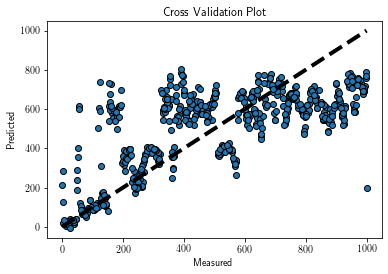

In [167]:
fig, ax = plt.subplots()
ax.scatter(y_test, predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Cross Validation Plot')
plt.show()


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


ValueError: 'c' argument has 600 elements, which is not acceptable for use with 'x' with size 600, 'y' with size 600.

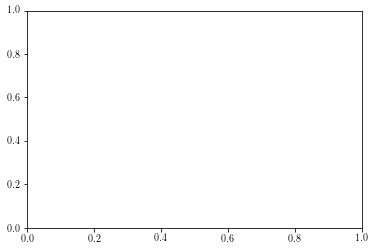

In [170]:
plt.scatter(np.log10(x),np.log10(y_pred), np.log10(x), np.log10(y_test))
#plt.xlim([0,200])
plt.title(r'\textbf{The time evolution of $X_{1}(t)$}')
plt.xlabel('$\log_{10} N$')
plt.ylabel('$\log_{10} X_{1}(t)$')
plt.grid()
plt.legend([r'$SABA_{2}C$','MLP-Prediction'], loc = 'best')


In [143]:
pred = clf.predict(np.linspace(500, 1000, 1000).reshape(-1, 1))
pred.max(axis=0)

-34328.93890707867

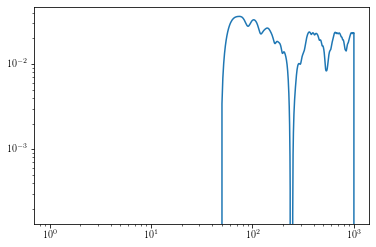

In [144]:
plt.loglog(np.linspace(0, N, N), LCE)

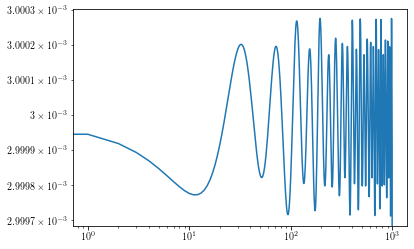

In [35]:
plt.loglog(np.linspace(0, N, N), error)

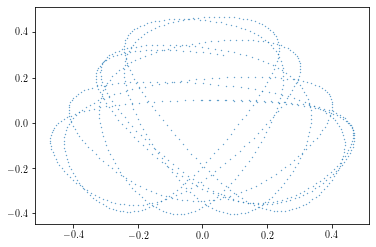

In [36]:
plt.scatter(x_c1, y_c1, s=0.1)

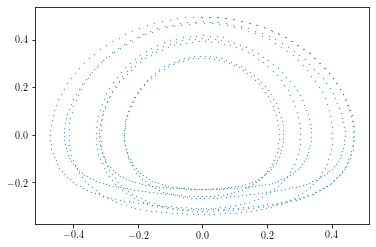

In [37]:
plt.scatter(x_c1, px_c, s=0.1)

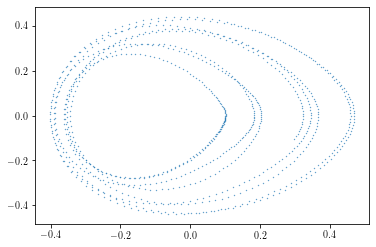

In [38]:
plt.scatter(y_c1, py_c, s=0.1)